# Unsupervised Learning (ule) - Mini-Challenge 2

**Ausgabe:** Freitag, 28. Mai 2021  
**Abgabe:** Freitag, 18. Juni 2021, bis 24 Uhr 

In dieser Mini-Challenge clustern wir die Sonnenspektren, die wir bereits aus der ersten ule Mini-Challenge kennen.

#### Vorgaben zu Umsetzung und Abgabe

- Code muss in python geschrieben werden.
- Wir entwickeln die meisten Algorithmen selber. Wenn nicht explizit anders verlangt, dürfen bloss die folgenden Bibliotheken verwendet werden: numpy, matplotlib, seaborn, pandas
- Der Code muss lauffähig sein bei Ausführung im Docker-Container des Trainingcenters. 
- Es darf kein Code ausgelagert werden.
- Sämtliche Plots sind komplett beschriftet (Achsen, Labels, Colorbar, ..) um den Plot verstehen zu können.
- Zu jedem Plot gibt es eine kurze Diskussion, welche den Plot erklärt und die wichtigsten Einsichten die damit sichtbar werden festhält.  
- Als Abgabe zählt der letzte Commit in deinem Fork des Trainingcenter Repos vor Abgabetermin.

Für die Erarbeitung der Inhalte darf zusammengearbeitet werden. Die Zusammenarbeit ist dabei aber auf algorithmische Fragen und Verständnisaspekte beschränkt.  

**Es darf kein zusammenhängender Code oder Text von anderen oder vom Internet kopiert werden.**

#### Bitte lösche, dupliziere oder verschiebe die vorgegebenen Antwortzellen NICHT!
Dies führt zu Problemen bei der automatischen Korrektur.  
Ihr dürft aber so viele neue Zellen hinzufügen wie ihr möchtet.

Bitte importiere Daten mit relativen Pfaden.

---

### Aufgabe 1 - (4 Punkte)

Lade erneut den Datensatz der Sonnenspektren (`data/iris_sun_spectra.npy`), welchen wir bereits in der ersten ule Mini-Challenge verwendet haben, mit der Funktion `np.load`. 

Der Wellenlängenbereich der Spektren ist 279.414 nm - 280.572 nm, unterteilt in 240 Schritte. Die Intensität ist pro Spektrum auf 1 normiert.  

Visualisiere erneut einige Beispiele.  

Beschreibe nun in Worten was es bedeutet, diese Spektren zu clustern.

Datensatz mit Länge:  791537 und Breite von  240
Datensatz enthält 189,968,880 Informationen


<AxesSubplot:>

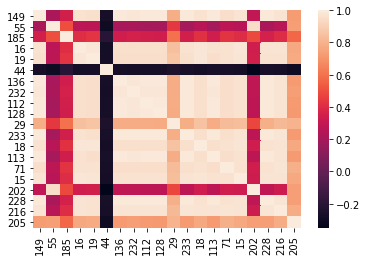

In [3]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt

sun = np.load('../../../data/iris_sun_spectra.npy')
print('Datensatz mit Länge: ',sun.shape[0], 'und Breite von ', sun.shape[1])
print('Datensatz enthält {:,} Informationen'.format(sun.shape[0]*sun.shape[1]))

df_sun = pd.DataFrame(sun)
randomlist = random.sample(range(0, 239), 20)
df_sun_sample = df_sun[randomlist]
df_sun_sample_head = df_sun_sample.head(10000)

corrMatrix_sample = df_sun_sample.corr()
sns.heatmap(corrMatrix_sample)


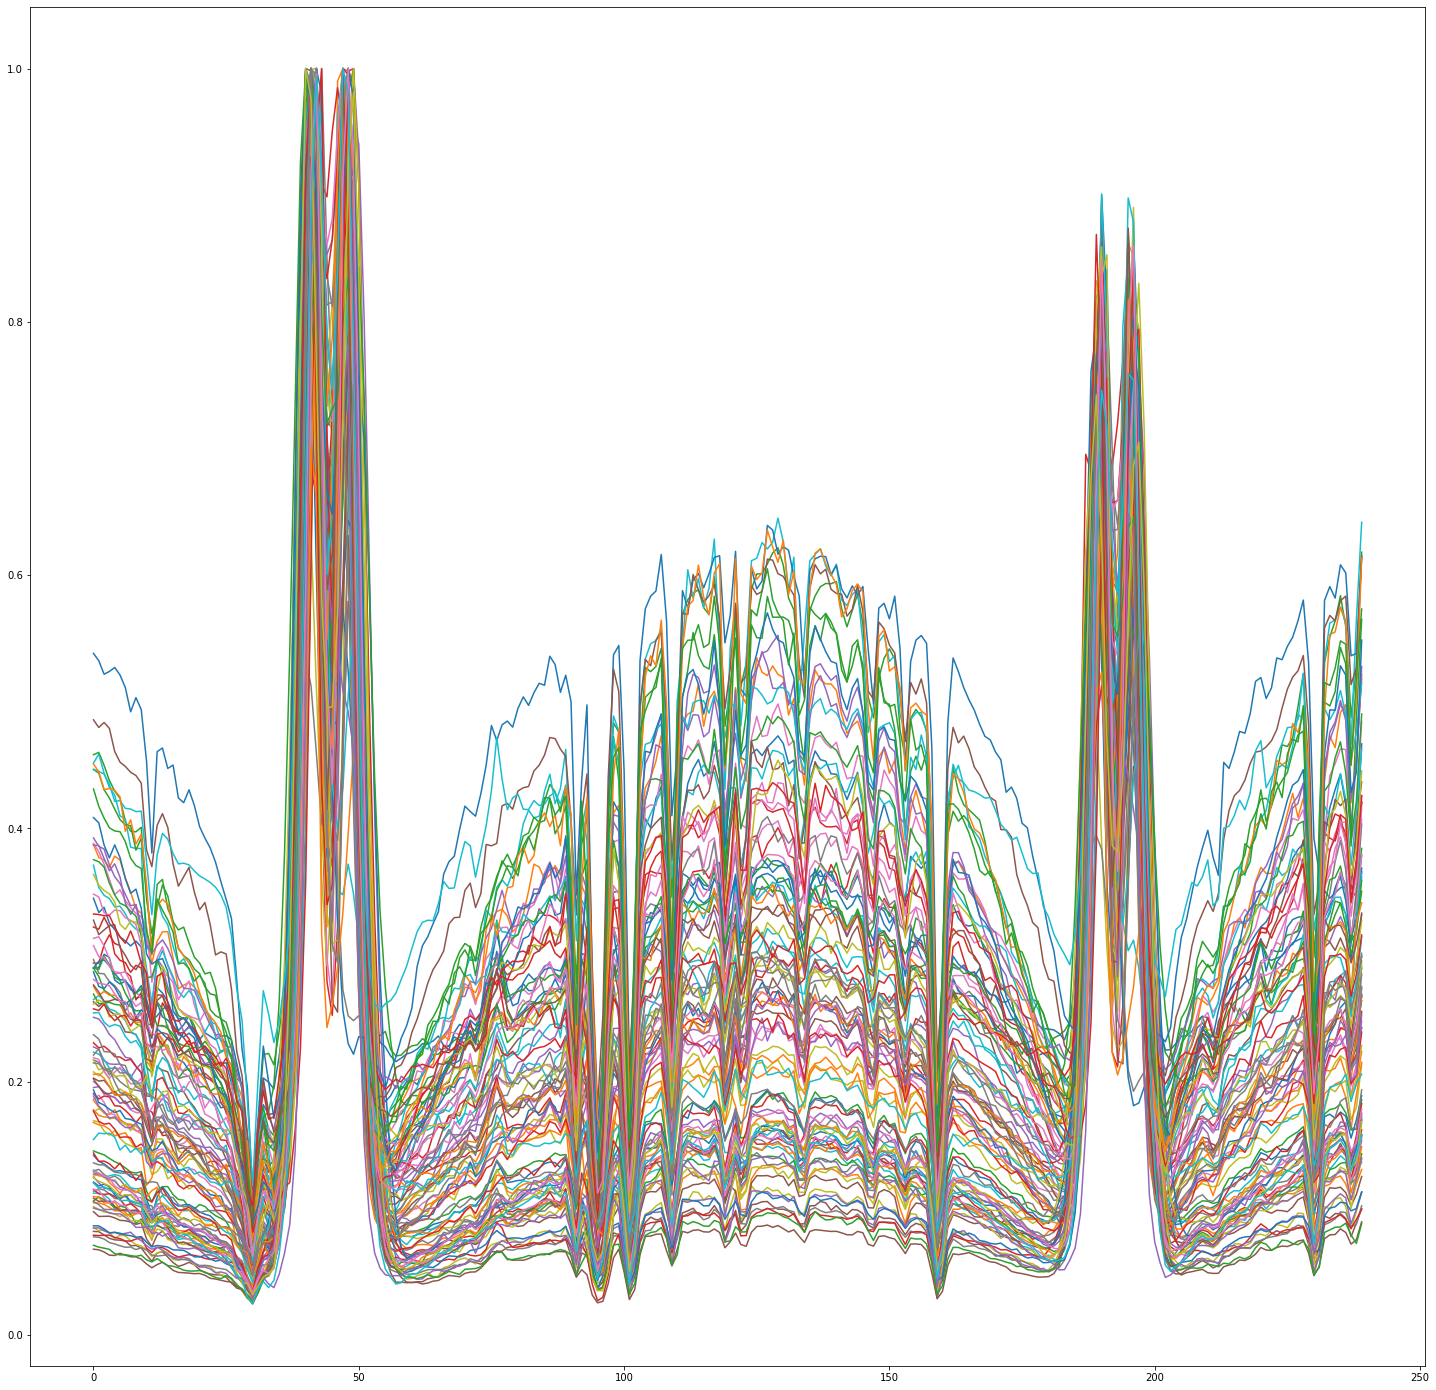

In [4]:
for i in range(100):
    df_sun.T[i].plot(figsize=(25,25))

Diese Grafik zeigt die verteilung der Spektren. Man sieht, dass gewisse Spektren einen hohen ausschlag haben. Einige der Spektren scheinen
in dem Grossteil der Messungen einen höheren Wert zu besitzen als andere.

## Was bedeuted ese die Spektren zu clustern?

Der Datensatz besitzt Aufnahmen von Werten der verschiedenen Sonnenspektren. Die Spektren
bezeichnen ja eigenlich die Intensität der Photonen. Gewisse Tiere können nur gewisse Spekren sehen
aber auch wir können nicht das ganze Spektrum erblicken. z.B Infrarot bleibt uns verborgen.

Je grösser der gemessene Wert ist, desto mehr von diesem Spektrum wurde von der Sonne abgegeben.
Ich bin kein Sonnenwissenschaftler, also kenne ich mich nicht wirlkich mit der Bedeutung der Spektrem für die Beobachtung aus.
Allerdings gehe ich davon aus, dass mann gewissen Korrelationnen sucht.
Ich stelle mir vor, dass eine grosse Sonne in der Theorie in allen Spektren einfach intensivere Spektren abgibt, in der
Praxis ist dies vermutlich nicht der Fall. Denn Sonnen unterscheiden sich ja auch in ihrer Lebenszeit und so weiter.

Eine Sonne schein also nicht nur, sie gibt verschiedene Arten von Spektren von sich und diese haben einen grossen Einfluss auf unser Leben.
Ich kann mir vorstellen, dass mit der verteilung der Spektren die Lebenszeit der Sonne gemessen werden kann.
Die grosse Frage ist aber, kann man von gewissen Spekten auf andere Spekten schiessen. Oder ist die verteilung der Spektren komlett zufällig.

Die Korrelationsuntersuchung der letzten Mini-Challenge hat ja ergeben, dass gewisse Korrelationen existieren.
Dies würde ja bedeuten, dass es einen pysikalischen Zusammenhang zwischen gewissen Spekten gibt.
Also dass, wenn etwas gewisse passiert auch gewisse Spektren ausschlagen.

Es ist allerdings auch wichtig, die Messungen mit einader zu vergleichen. Wenn die Datenpunkte gut gecluster werden können,
würde dass einen Hinweiss auf einen Sonnenzyklus geben.


Zusammengefasst sucht man nach Spektren, die ähnlich sind und darum auf einen gemeinsamen pyhiskalischen Ursprung zurückzuführen sind.
Zusätzlich sucht man nach kombinationen von vielen oder sogar allen Spektren, die vermehrt vorkommen.


### Aufgabe 2 - K-Means (8 Punkte)

K-Means ist ein Clustering-Algorithmus. Mit K-Means können wir einen Datensatz in $K$ Gruppen (Cluster) unterteilen. Eine Funktion $C(i) \in \{ 1, \dots, K \}$ ordnet dabei jedem Datenpunkt $i$ einen Cluster $k$ zu. 

Die $K$ Gruppen werden dabei über $K$ Zentroiden, Clustermittelpunkte $\mu_k$, charakterisiert. Datenpunkte (Pixelwerte in unserem Fall) werden dem Zentroiden zugeordnet, der ihnen am nächsten ist. Der K-Means-Algorithmus (siehe unten) findet dabei ein lokales Minimum für die Funktion

$$ J(C) = \sum_{k=1}^{K} \sum_{C(i)=k} ||x^{(i)} - \mu_k||^2 $$

Er minimiert also den summierten quadrierten Abstand der Datenpunkte zu ihrem Zentroiden.  

Da der Algorithmus nur ein lokales Minimum findet, initialisiert man den Algorithmus in der Regel mehrfach und behält am Schluss die Lösung mit dem kleinsten Wert für die Kostenfunktion.

Ein Durchlauf / eine Initialisierung des Algorithmus funktioniert wie folgt:

---

#### K-Means Algorithmus

*Initialisierung*: Wähle $K$ Zentroiden zufällig aus den gegebenen Datenpunkten.

*Schritt 1*: Für gegebene Zentroiden $(\mu_1, .., \mu_k)$ ordne man sämtliche Datenpunkte jeweils jenem Cluster zu, dessen Zentroid dem jeweiligen Datenpunkt am nächsten ist. Also


\begin{eqnarray}
C(i) = \mathsf{argmin}_k ||x^{(i)} - \mu_k||^2
\end{eqnarray}


*Schritt 2*: Für eine gegebene Cluster-Zuordnung $C$ minimiere man die 'Gesamt-Cluster-Varianz' durch Aktualisieren der Zentroiden mit:


\begin{eqnarray}
\mu_k = \frac{1}{N_k} \sum_{C(i)=k}x^{(i)}
\end{eqnarray}

$N_k$ sind die Anzahl Datenpunkte, die k zugeordnet sind.  

*Schritt 3*: Man wiederhole die Schritte 1 und 2 bis sich die Zentroiden nicht mehr verändern oder der Wert der Funktion $J(C)$ sich kaum mehr verbessert.

---

Vervollständige die folgende Klasse, welche den K-Means-Algorithmus umsetzen soll.  

Zeige anhand eines konstruierten Beispiels, dass dein Algorithmus zuverlässig funktioniert.


In [5]:
import random
# If you want, you can use the following function to efficiently compute pairwise distances.
# Read the docstring to learn how to use it.

from scipy.spatial.distance import cdist

class KMeans(object):

    def __init__(self, k=3, n_inits=10, random_seed=0):
        '''KMeans clustering algorithm.

        Parameters
        ----------
        k: number of clusters
        n_intis: number of initializations
        '''
        # Parameters
        self.k = k
        self.n_inits = n_inits
        self.random_seed = None

        # The following attributes will be computed through execution of the
        # KMeans algorithm in the fit method.
        self.centroids_ = None
        #list of labels for all datapoints
        self.labels_ = None
        self.num_iterations_ = 0

    def fit(self, X):
        '''Clusters the dataset X into k clusters.
        '''
        random.seed(self.random_seed)
        self.labels_ = np.zeros(len(X))
        converged = False
        self.centroids_ = X[random.sample(range(X.shape[0]),self.k)]
        
        while not converged:
            self.labels_ = np.argmin(cdist(X, self.centroids_ , metric='euclidean'), axis=1)
            centroids_new = np.array([np.mean(X[self.labels_ == l], axis=0) for l in range(self.k)])
            if np.all(self.centroids_ == centroids_new):
                converged = True
            # Zentren werden aktualisiert
            self.centroids_ = centroids_new
            self.num_iterations_ += 1
        return self.labels_

    def cost_function(self, X):
        '''Computes the KMeans cost function for a given dataset X.
        '''
        return np.sum(np.min(cdist(X, self.centroids_ , metric='euclidean'), axis=1))


    def predict(self, X_new):
        '''Assigns each data point in X to the closest cluster.
        Can only be used after the clustering algorithm has been executed.
        '''
        return np.argmin(cdist(X_new, self.centroids_, metric='euclidean'), axis=1)




Text(0.5, 0, 'X')

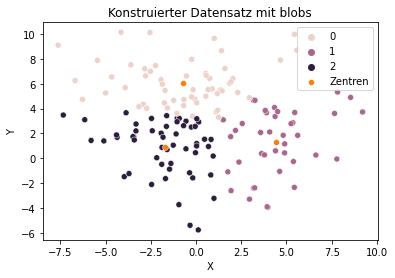

In [6]:
import seaborn as sns
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150, centers=3, cluster_std=3, n_features=2, random_state=0)

km = KMeans()
km.fit(X)

sns.scatterplot(x=X[:,0], y=X[:,1],hue=km.predict(X))
ax = sns.scatterplot(x=km.centroids_[:,0], y=km.centroids_[:,1], label='Zentren')
ax.set_title("Konstruierter Datensatz mit blobs")
ax.set_ylabel("Y")
ax.set_xlabel("X")



### Aufgabe 3 - K-Means auf Sonnenspektren (6 Punkte)

Nimm ein Clustering mit deiner Implementierung von KMeans der Sonnenspektren vor.  

Bestimme einen sinnvollen Wert für $K$. Erläutere dabei dein Vorgehen und diskutiere auch alternative Möglichkeiten dafür.  

Zeichne die Zentroiden.  

Beschreibe und diskutiere deine Resultate.  
Lege dabei Unterschiede von Zentroiden und Principal Components, sowie NMF Komponenten aus der ersten ule Mini-Challenge dar.  

Könnte man K-Means auch als Matrizen-Zerlegung betrachten? Wie?

#### optimalers k

Das optimale k kann mit verschiedensten Methoden herausgefunden werden. Die einfachste ist einfach
das Modell mit verschiedenen k's zu berechnen und zu schauen, wo der Knick ist. Diese Methode wird auch Elbow methode genannt
und berechnet den SSE des Modelles.

Eine Alternative wäre die Silhouette Methode

In [7]:
from sklearn.metrics import silhouette_score


X = df_sun_sample_head.to_numpy()
X_new = df_sun_sample_head.to_numpy()
errorlist = []
errorlist_s = []
for i in range(2,20):
    km = KMeans(k=i)
    km.fit(X)
    #km.predict(X_new)
    errorlist.append(km.cost_function(X))
    errorlist_s.append(silhouette_score(cdist(X, km.centroids_, metric='euclidean'), km.labels_, metric = 'euclidean', sample_size=1000))
    del km

Text(0.5, 1.0, 'Error_score with best k = 4')

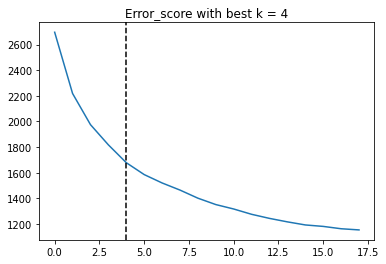

In [8]:
plt.plot(errorlist)
plt.axvline(x=4, color='k', linestyle='--')
plt.title("Error_score with best k = 4")

Text(0.5, 1.0, 'Silhouette_score')

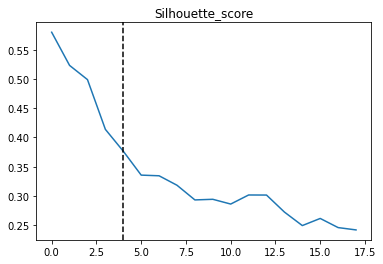

In [9]:
plt.plot(errorlist_s)
plt.axvline(x=4, color='k', linestyle='--')
plt.title("Silhouette_score")

#### Visualisierung der Zentroiden

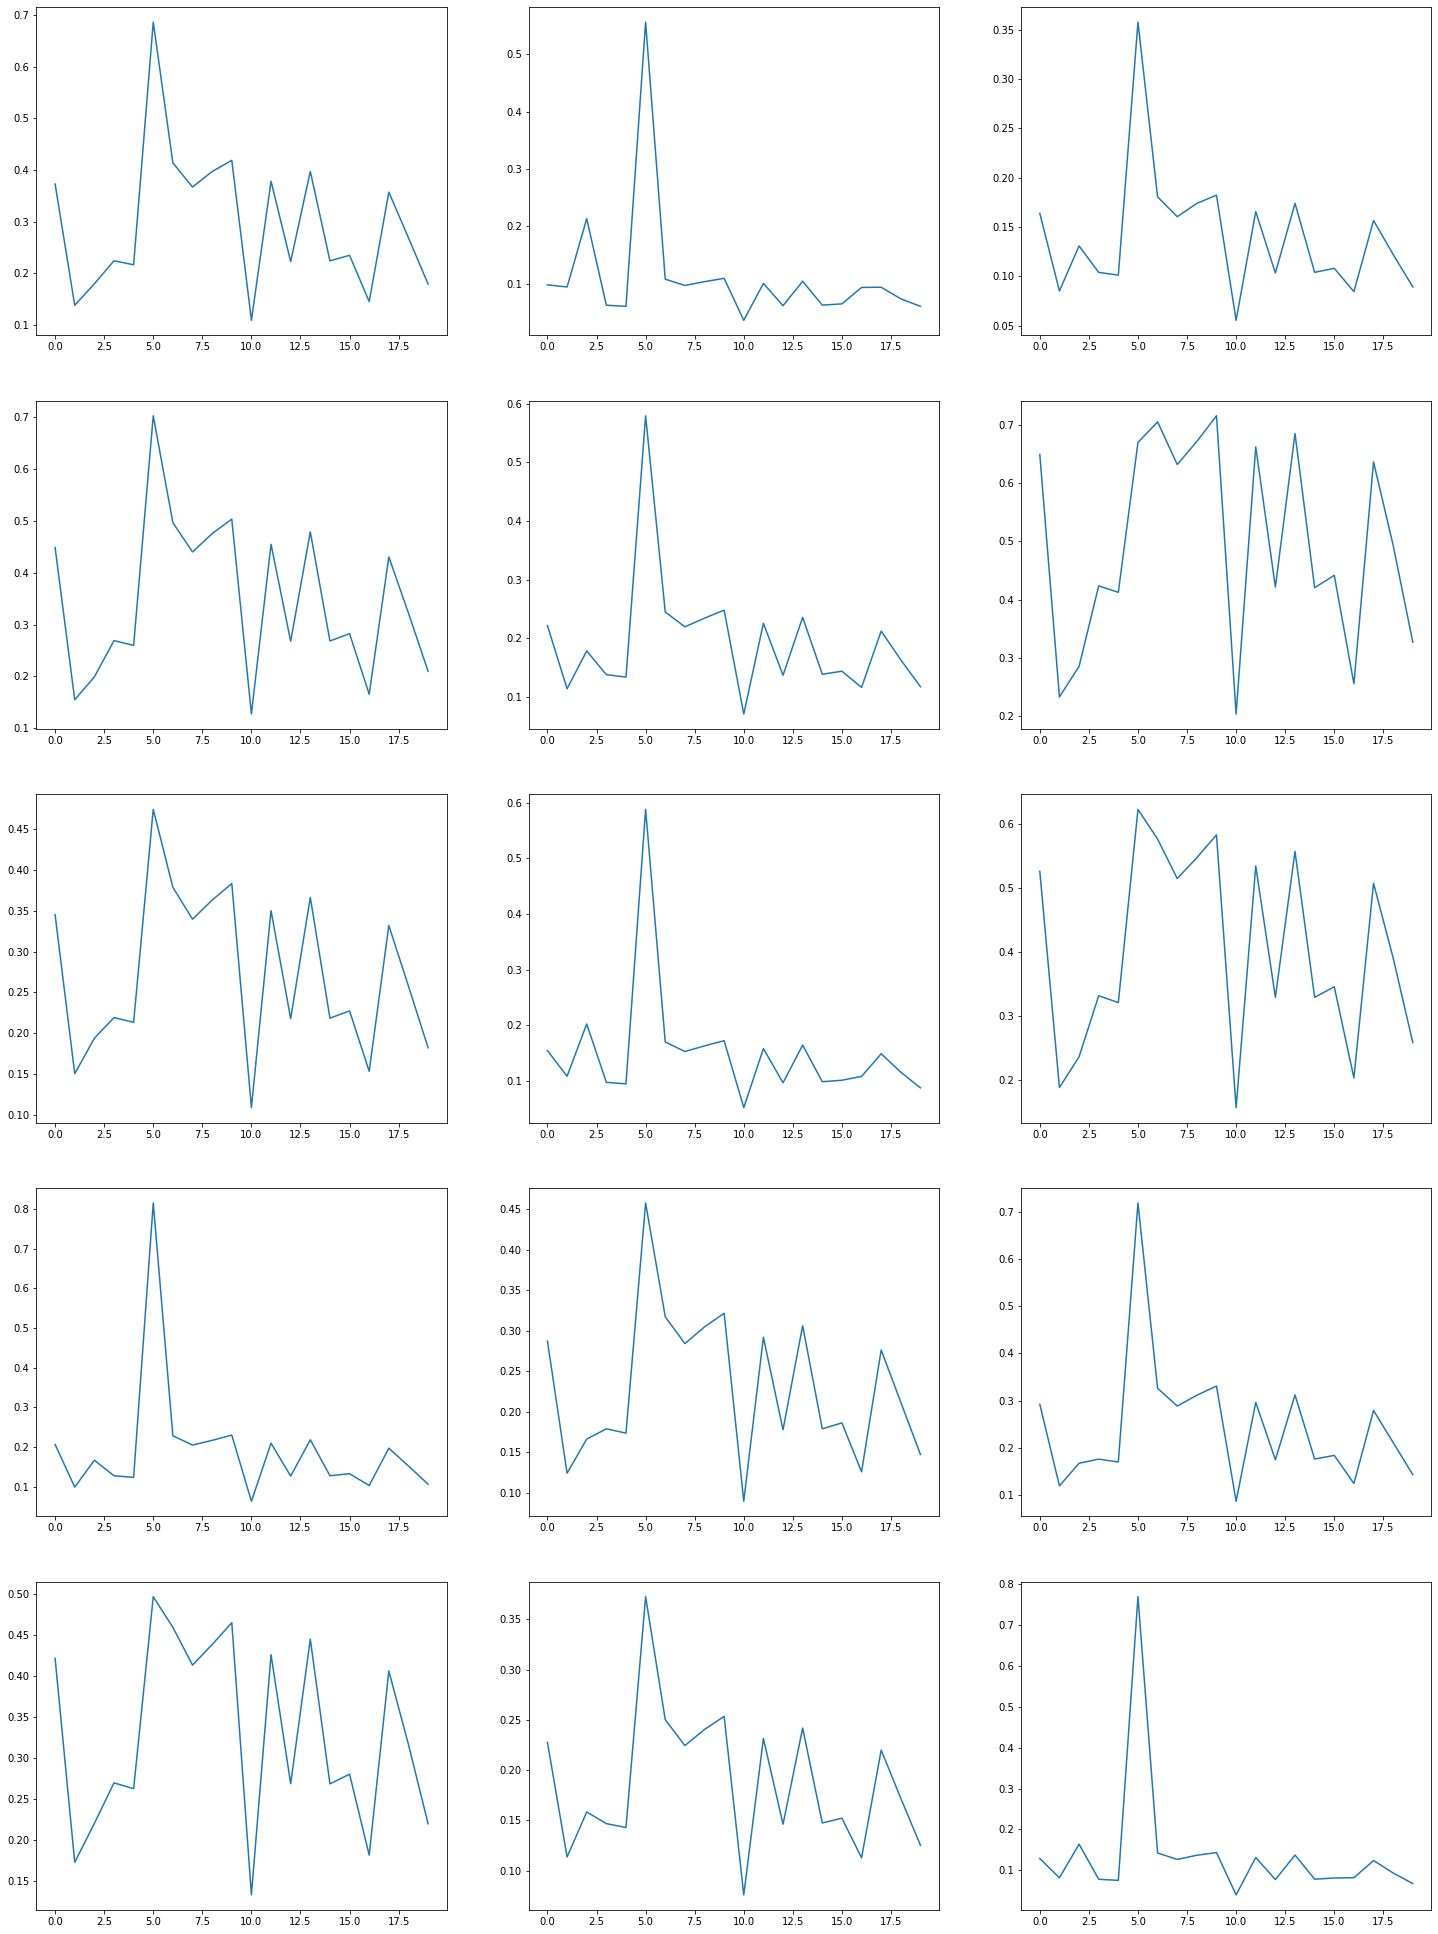

In [27]:
kmeans = KMeans(k = 15, random_seed=0)
kmeans.fit(X)

fig, ax = plt.subplots(5, 3, figsize=(25, 35))
for i in range(len(kmeans.centroids_)):
    j = i // 3
    k = i % 3
    ax[j,k].plot(kmeans.centroids_[i,:])
plt.show()

20

### Aufgabe 4 (5 Punkte)

Visualisiere die Cluster im Raum der ersten beiden Principal Components zusammen mit ihren Zentroiden.  
Zur Transformation in den Raum der Principal Components darfst du scikit-learn verwenden.

Beschreibe und diskutiere deine Resultate. Entsprechen sie deinen Erwartungen?

<AxesSubplot:>

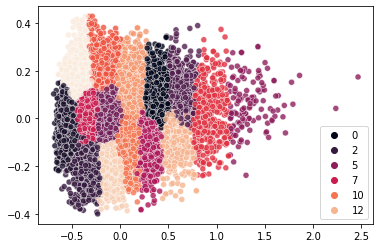

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca = pca.fit_transform(X)
sns.scatterplot(x=pca[:,0], y=pca[:,1], hue=kmeans.labels_, palette = "rocket", alpha=0.8)

Man sieht eine gewisse Clusterbildung, jedoch überlappen sich die Cluster immer ein wenig. Der Kmeans auf die projezierung auf die ersten 2
Komponenten macht schlussfogernd eine softe Clustergrenze.


### Aufgabe 5 (4 Punkte)

Erkläre, den Modellansatz von Gaussian Mixture Models und
warum diese oft auch als Soft K-Means Clustering bezeichnet werden.

Schreibe den Expectation Maximization (EM) -Algorithmus für
Gaussian Mixture Models auf. Wozu dient er?

Der Gaussian Mixture Model Ansatz ist wie der Kmeans ein Modellansatz, der sich mit dem unsupervised
Clustering eines Datensatztes beschäftigt. Viele Modelle können sehr gut mit einer Gausskurve beschrieben werden,
jedoch gibt es auch Datensätze wo es klar ersichlich ist, dass es mehrere Gausskurven benötigt, um den
Datensatz zu beschreiben. Der GMM berechnet also die k- besten Gausskurven und deren Wahrscheinlichkeit.
Hier wird auch der grosse Unterschied zum KMeans ersichtlich. Während der KMeans eine harte Grenze zwischen den Clustern heruasgibt,
ist der GMM eine Wahrscheinlichkeit, dass ein Datenpunkt in einem Cluster ist. Darum wird der GMM auch als Soft-KMeans bezeichnet.

### EM

Der Expectation Maximization Algorithmus besteht aus 2 Schritten: dem Expectation Step und dem Maximisatzin Step.
Danach wird geschaut ob ein gewisser Threshold erreicht wurde. Wenn dieser noch nicht erreicht wurde, heisst das,
dass der Maximation Step noch nicht converged ist und danach wird der Maximierte Wert wieder in den Expectation Step geführt.

#### 0. Initialisierung
Die Anzal Clusters muss bestimmt werden.
mean,covariance, Anzahl Datenpunkte im Cluster

#### 1. Expectationstep

1. Berecne für $Xi$ die Wahrscheinlichkeit, dass ein Datenpunkt zu einem Cluster gehört.
$\frac{Wahrscheinichkeit für cluster}{allgemeine Wahrscheinlichkeit}$

#### 2. Maximisation Step
1. Berechnet für jeden Cluster die Gewichtungen und updated den Mean die covarance und die Wahrscheinlicheit

#### 3. Wiederhohlung
Diese Schritte werden solange wiederholt, bis die loglikely Funktion abflacht.




### Aufgabe 6 (7 Punkte)

Verwende nun einen Gaussian Mixture Model (GMM) -Ansatz, um die Spektren zu clustern. Ziehe dazu ein Sample von 5000 zufällgigen Spektren. 
Finde wiederum eine geeignete Anzahl Cluster $k$.  

Zeichne die Cluster Means.  

Berechne die Unsicherheit $u_i = 1 - \max_k(r_{ik})$ der Clusterzuweisung, wobei $r_{ik} = p(z_i = k | \mathbf{x}_i, \mathbf{\theta})$ die *'responsibility'* von Cluster $k$ für Datenpunkt $i$ sei.

Zeichne erneut die Clusterzuweisung der Datenpunkte im Raum der ersten beiden Principal Components und verwende die Uncertainty als Transparenzwert.

Beschreibe und diskutiere deine Resultate.

### best k(mit elbow methode)

Text(0.5, 1.0, 'gmm mit bestes k=2')

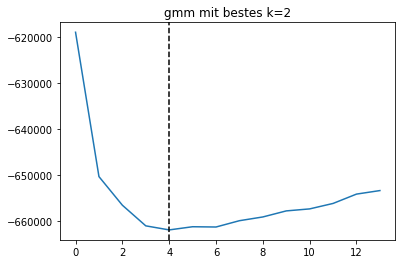

In [12]:
X2 = df_sun_sample.head(5000)
from sklearn.mixture import GaussianMixture

bic_error = []
for i in range(1,15):
    model = GaussianMixture(n_components=i)
    model.fit(X2)
    bic_error.append(model.bic(X2))
plt.plot(bic_error)
plt.axvline(x=4, color='k', linestyle='--')
plt.title("gmm mit bestes k=2")

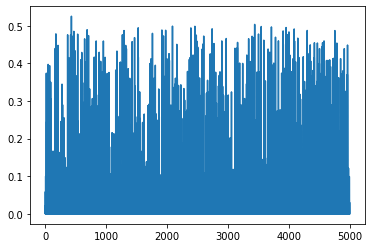

In [13]:
model = GaussianMixture(n_components=4)
model.fit(X2)
u = 1 - np.max(model.predict_proba(X2), axis=1)

### Clusterzuweisung im Raum der ersten 2 Components

<AxesSubplot:>

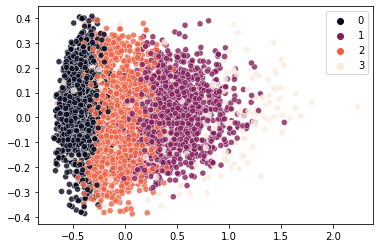

In [14]:
pca = PCA(n_components=2)
pca_2 = pca.fit_transform(X2)
sns.scatterplot(x=pca_2[:,0], y=pca_2[:,1], hue=model.predict(X2), palette = "rocket",alpha=0.8)